In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests

In [3]:
col_names = requests.get("https://raw.githubusercontent.com/Bee-Mar/AWID-Intrusion-Detection/master/resources/col_names.txt").text
col_names = col_names.split('\n')[:155]

In [4]:
set([x for x in col_names if col_names.count(x) > 1])

{'wlan.qos.buf_state_indicated'}

In [5]:
col_names[152] = 'wlan.qos.buf_state_indicated2'

In [6]:
# df = pd.read_csv('/kaggle/input/awidclsr/AWID-CLS-R-Trn/AWID-CLS-R-Trn/1', names=col_names, header=None,sep = ',')
# sampling_seed = 42
# df = pd.concat([df[df['class'] == 'injection'].sample(frac=1,random_state=sampling_seed),df[df['class'] == 'normal'].sample(frac=0.1,random_state=sampling_seed)])
# df.replace("?", np.nan, inplace = True)
# append_isnull_cols = []
# delete_cols = []
# for col in df.columns:
#     percent = (df[col].isna().sum()/len(df))*100
#     if(percent > 0 and percent < 90):
#         append_isnull_cols.append(col)
#     if(percent > 90):
#         delete_cols.append(col)

In [6]:

append_isnull_cols = ['radiotap.mactime','radiotap.flags.cfp','radiotap.flags.preamble','radiotap.flags.wep','radiotap.flags.frag','radiotap.flags.fcs','radiotap.flags.datapad','radiotap.flags.badfcs','radiotap.flags.shortgi','radiotap.channel.freq','radiotap.channel.type.turbo','radiotap.channel.type.cck','radiotap.channel.type.ofdm','radiotap.channel.type.2ghz','radiotap.channel.type.5ghz','radiotap.channel.type.passive','radiotap.channel.type.dynamic','radiotap.channel.type.gfsk','radiotap.channel.type.gsm','radiotap.channel.type.sturbo','radiotap.channel.type.half','radiotap.channel.type.quarter','radiotap.dbm_antsignal','radiotap.antenna','radiotap.rxflags.badplcp','wlan.duration','wlan.ra','wlan.da','wlan.ta','wlan.sa','wlan.bssid','wlan.frag','wlan.seq','wlan.fcs_good','wlan.wep.iv','wlan.wep.key','wlan.wep.icv','wlan.qos.tid','wlan.qos.priority','wlan.qos.eosp','wlan.qos.ack','wlan.qos.amsdupresent','wlan.qos.buf_state_indicated2','data.len']
delete_cols= ['frame.dlt','wlan.bar.type','wlan.ba.control.ackpolicy','wlan.ba.control.multitid','wlan.ba.control.cbitmap','wlan.bar.compressed.tidinfo','wlan.ba.bm','wlan_mgt.fixed.capabilities.ess','wlan_mgt.fixed.capabilities.ibss','wlan_mgt.fixed.capabilities.cfpoll.ap','wlan_mgt.fixed.capabilities.privacy','wlan_mgt.fixed.capabilities.preamble','wlan_mgt.fixed.capabilities.pbcc','wlan_mgt.fixed.capabilities.agility','wlan_mgt.fixed.capabilities.spec_man','wlan_mgt.fixed.capabilities.short_slot_time','wlan_mgt.fixed.capabilities.apsd','wlan_mgt.fixed.capabilities.radio_measurement','wlan_mgt.fixed.capabilities.dsss_ofdm','wlan_mgt.fixed.capabilities.del_blk_ack','wlan_mgt.fixed.capabilities.imm_blk_ack','wlan_mgt.fixed.listen_ival','wlan_mgt.fixed.current_ap','wlan_mgt.fixed.status_code','wlan_mgt.fixed.timestamp','wlan_mgt.fixed.beacon','wlan_mgt.fixed.aid','wlan_mgt.fixed.reason_code','wlan_mgt.fixed.auth.alg','wlan_mgt.fixed.auth_seq','wlan_mgt.fixed.category_code','wlan_mgt.fixed.htact','wlan_mgt.fixed.chanwidth','wlan_mgt.fixed.fragment','wlan_mgt.fixed.sequence','wlan_mgt.tagged.all','wlan_mgt.ssid','wlan_mgt.ds.current_channel','wlan_mgt.tim.dtim_count','wlan_mgt.tim.dtim_period','wlan_mgt.tim.bmapctl.multicast','wlan_mgt.tim.bmapctl.offset','wlan_mgt.country_info.environment','wlan_mgt.rsn.version','wlan_mgt.rsn.gcs.type','wlan_mgt.rsn.pcs.count','wlan_mgt.rsn.akms.count','wlan_mgt.rsn.akms.type','wlan_mgt.rsn.capabilities.preauth','wlan_mgt.rsn.capabilities.no_pairwise','wlan_mgt.rsn.capabilities.ptksa_replay_counter','wlan_mgt.rsn.capabilities.gtksa_replay_counter','wlan_mgt.rsn.capabilities.mfpr','wlan_mgt.rsn.capabilities.mfpc','wlan_mgt.rsn.capabilities.peerkey','wlan_mgt.tcprep.trsmt_pow','wlan_mgt.tcprep.link_mrg','wlan.tkip.extiv','wlan.ccmp.extiv','wlan.qos.buf_state_indicated','wlan.qos.bit4','wlan.qos.txop_dur_req']

In [7]:
def df_data_clean(df):
    df = df[(df['class'] == 'injection') | (df['class'] == 'normal')]
    df.replace("?", np.nan, inplace = True)
    df['radiotap.present.reserved'] = df['radiotap.present.reserved'].apply(int, base=16)
    df['wlan.duration'] = df['wlan.duration'].apply(lambda x: int(x) if(pd.notnull(x)) else x)
    df['wlan.fc.type_subtype'] = df['wlan.fc.type_subtype'].apply(lambda x: int(x,base=16) if(pd.notnull(x)) else x)
    df['wlan.qos.ack'] = df['wlan.qos.ack'].apply(lambda x: int(x,base=16) if(pd.notnull(x)) else x)

    df['wlan.fc.ds'] = df['wlan.fc.ds'].apply(lambda x: int(x,base=16) if(pd.notnull(x)) else x)
    df.drop('wlan.ra',axis=1,inplace= True)
    df.drop('wlan.ta',axis=1,inplace= True)
    df.drop('wlan.da',axis=1,inplace= True)
    df.drop('wlan.sa',axis=1,inplace= True)
    df.drop('wlan.bssid',axis=1,inplace= True)
    df['wlan.frag'] = df['wlan.frag'].apply(lambda x: int(x) if(pd.notnull(x)) else x)
    df['wlan.seq'] = df['wlan.seq'].apply(lambda x: int(x) if(pd.notnull(x)) else x)
    df['wlan.wep.iv'] = df['wlan.wep.iv'].apply(lambda x: int(x,base=16) if(pd.notnull(x)) else x)
    df['wlan.wep.key'] = df['wlan.wep.key'].apply(lambda x: int(x) if(pd.notnull(x)) else x)
    df['wlan.wep.icv'] = df['wlan.wep.icv'].apply(lambda x: int(x,base=16) if(pd.notnull(x)) else x)
    df['data.len'] = df['data.len'].apply(lambda x: int(x) if(pd.notnull(x)) else x)
    df['wlan.bar.type'] = df['wlan.bar.type'].apply(lambda x: int(x,base=16) if(pd.notnull(x)) else x)
    df['wlan.bar.compressed.tidinfo'] = df['wlan.bar.compressed.tidinfo'].apply(lambda x: int(x,base=16) if(pd.notnull(x)) else x)
    df['wlan_mgt.fixed.capabilities.cfpoll.ap'] = df['wlan_mgt.fixed.capabilities.cfpoll.ap'].apply(lambda x: int(x,base=16) if(pd.notnull(x)) else x)
    df['wlan_mgt.fixed.listen_ival'] = df['wlan_mgt.fixed.listen_ival'].apply(lambda x: int(x,base=16) if(pd.notnull(x)) else x)
    df['wlan_mgt.fixed.status_code'] = df['wlan_mgt.fixed.status_code'].apply(lambda x: int(x,base=16) if(pd.notnull(x)) else x)
    df['wlan_mgt.fixed.aid'] = df['wlan_mgt.fixed.aid'].apply(lambda x: int(x,base=16) if(pd.notnull(x)) else x)
    df['wlan_mgt.fixed.reason_code'] = df['wlan_mgt.fixed.reason_code'].apply(lambda x: int(x,base=16) if(pd.notnull(x)) else x)
    df['wlan_mgt.fixed.auth_seq'] = df['wlan_mgt.fixed.auth_seq'].apply(lambda x: int(x,base=16) if(pd.notnull(x)) else x)

    df.drop(delete_cols,axis = 1,inplace= True)
    #print(f'total of {len(delete_cols)} columns deleted')

    for col in append_isnull_cols:
        if col in df.columns:
            df[col+'_isnull'] = df[col].isna()

    df.fillna(0,inplace = True)
    df.replace({False: 0, True: 1}, inplace=True)
    
    for cl,dt in zip(df.columns,df.dtypes):
        if(dt == 'object' and cl != 'class'):
            print(cl,dt,df[cl][df[cl].notnull()].iloc[0])
            df[cl] = pd.to_numeric(df[cl])
    df['class'] = df['class'].apply(lambda x:int(x=='injection'))
    afterclean_cols = list(df.drop('class',axis=1).columns)
    X = df.drop('class',axis=1).to_numpy().astype('float32')
    Y = df['class'].to_numpy()
    return X,Y,afterclean_cols

In [8]:
df = pd.read_csv('/kaggle/input/awidclsr/AWID-CLS-R-Trn/AWID-CLS-R-Trn/1', names=col_names, header=None,sep = ',')
sampling_seed = 42
df = pd.concat([df[df['class'] == 'injection'].sample(frac=1,random_state=sampling_seed),df[df['class'] == 'normal'].sample(frac=0.1,random_state=sampling_seed)])
X_train,Y_train,_ = df_data_clean(df)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


radiotap.mactime object 3662367349
radiotap.flags.cfp object 0
radiotap.flags.preamble object 0
radiotap.flags.wep object 0
radiotap.flags.frag object 0
radiotap.flags.fcs object 1
radiotap.flags.datapad object 0
radiotap.flags.badfcs object 0
radiotap.flags.shortgi object 0
radiotap.channel.freq object 2437
radiotap.channel.type.turbo object 0
radiotap.channel.type.cck object 1
radiotap.channel.type.ofdm object 0
radiotap.channel.type.2ghz object 1
radiotap.channel.type.5ghz object 0
radiotap.channel.type.passive object 0
radiotap.channel.type.dynamic object 0
radiotap.channel.type.gfsk object 0
radiotap.channel.type.gsm object 0
radiotap.channel.type.sturbo object 0
radiotap.channel.type.half object 0
radiotap.channel.type.quarter object 0
radiotap.dbm_antsignal object -64
radiotap.antenna object 1
radiotap.rxflags.badplcp object 0
wlan.fcs_good object 1
wlan.qos.tid object 0
wlan.qos.priority object 0
wlan.qos.eosp object 0
wlan.qos.amsdupresent object 0
wlan.qos.buf_state_indicated

In [9]:
df_test = pd.read_csv('/kaggle/input/awidclsr/AWID-CLS-R-Tst/AWID-CLS-R-Tst/1', names=col_names, header=None,sep = ',')
X_test,Y_test,afterclean_cols = df_data_clean(df_test)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

radiotap.mactime object 8987920748


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


radiotap.flags.cfp object 0
radiotap.flags.preamble object 0
radiotap.flags.wep object 0
radiotap.flags.frag object 0
radiotap.flags.fcs object 1
radiotap.flags.datapad object 0
radiotap.flags.badfcs object 0
radiotap.flags.shortgi object 0
radiotap.channel.freq object 2437
radiotap.channel.type.turbo object 0
radiotap.channel.type.cck object 0
radiotap.channel.type.ofdm object 1
radiotap.channel.type.2ghz object 1
radiotap.channel.type.5ghz object 0
radiotap.channel.type.passive object 0
radiotap.channel.type.dynamic object 0
radiotap.channel.type.gfsk object 0
radiotap.channel.type.gsm object 0
radiotap.channel.type.sturbo object 0
radiotap.channel.type.half object 0
radiotap.channel.type.quarter object 0
radiotap.dbm_antsignal object -25
radiotap.antenna object 1
radiotap.rxflags.badplcp object 0
wlan.fcs_good object 1
wlan.qos.tid object 1
wlan.qos.priority object 1
wlan.qos.eosp object 0
wlan.qos.amsdupresent object 0
wlan.qos.buf_state_indicated2 object 0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [11]:
X_test = scaler.transform(X_test)

In [12]:
from sklearn.model_selection import train_test_split
X_train, _xt,Y_train,_yt = train_test_split(X_train, Y_train, test_size=0.001, random_state=42)

In [13]:
from sklearn import svm
import time
st = time.time()
clf = svm.SVC(kernel='linear')
clf.fit(X_train[0:70000], Y_train[0:70000])
#clf.fit(X_train, Y_train)
time.time()-st

1.960547924041748

In [89]:
from sklearn import svm
import time
st = time.time()
clf = svm.SVC(kernel='rbf')
clf.fit(X_train[0:100000,selected_features], Y_train[0:100000])
#clf.fit(X_train, Y_train)
time.time()-st

2.2576398849487305

In [36]:
#rf for feature selection purpose
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(random_state=0)
rclf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [82]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(max_depth=8,n_estimators=200,random_state=0)
rclf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=0)

In [83]:
clf=rclf

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, clf.predict(X_train[:,selected_features]))

0.9999562303857417

In [86]:
accuracy_score(Y_test, clf.predict(X_test[:,selected_features]))

0.9948197790917078

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = clf.predict(X_train[:,selected_features])

print(classification_report(Y_train, np.round(y_pred),digits=4))
print(confusion_matrix(Y_train, y_pred))

              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999    163149
           1     0.9995    1.0000    0.9998     65320

    accuracy                         0.9999    228469
   macro avg     0.9998    0.9999    0.9998    228469
weighted avg     0.9999    0.9999    0.9999    228469

[[163117     32]
 [     0  65320]]


In [44]:
from sklearn.metrics import roc_curve, auc
y_train_pred = clf.decision_function(X_train[:,selected_features])    
y_test_pred = clf.decision_function(X_test[:,selected_features]) 

AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

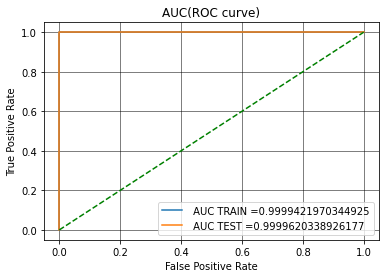

In [38]:
import matplotlib.pyplot as plt
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [1]:
cclf.coef_

NameError: name 'cclf' is not defined

In [15]:
selected_features= []
for i in range(len(cclf.coef_[0])):
    importance = cclf.coef_[0][i]
    if(importance > 0):
        selected_features.append(i)
print('len=',len(selected_features))

len= 19


In [26]:
selected_features= []
for i in range(len(rclf.feature_importances_)):
    importance = rclf.feature_importances_[i]
    if(importance > 0):
        selected_features.append(i)
print('len=',len(selected_features))

len= 46


In [107]:
afterclean_cols


['frame.interface_id',
 'frame.offset_shift',
 'frame.time_epoch',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_relative',
 'frame.len',
 'frame.cap_len',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.length',
 'radiotap.present.tsft',
 'radiotap.present.flags',
 'radiotap.present.rate',
 'radiotap.present.channel',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.rxflags',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'radiotap.mactime',
 'radiotap.flags.c

In [30]:
[afterclean_cols[x] for x in selected_features]

['frame.time_epoch',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_relative',
 'frame.len',
 'frame.cap_len',
 'radiotap.present.rxflags',
 'radiotap.mactime',
 'radiotap.datarate',
 'radiotap.channel.freq',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm',
 'radiotap.channel.type.2ghz',
 'radiotap.dbm_antsignal',
 'wlan.fc.type_subtype',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.duration',
 'wlan.frag',
 'wlan.seq',
 'wlan.wep.iv',
 'wlan.wep.key',
 'wlan.wep.icv',
 'wlan.qos.tid',
 'wlan.qos.priority',
 'data.len',
 'radiotap.channel.type.ofdm_isnull',
 'wlan.duration_isnull',
 'wlan.frag_isnull',
 'wlan.seq_isnull',
 'wlan.wep.iv_isnull',
 'wlan.wep.key_isnull',
 'wlan.wep.icv_isnull',
 'wlan.qos.tid_isnull',
 'wlan.qos.priority_isnull',
 'wlan.qos.eosp_isnull',
 'wlan.qos.ack_isnull',
 'wlan.qos.amsdupresent_isnull',
 'wlan.qos.buf_state_in

In [102]:
len([x for x in afterclean_cols if 'isnull' in x])
len(afterclean_cols)

126

In [103]:
delete_cols

['frame.dlt',
 'wlan.bar.type',
 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid',
 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo',
 'wlan.ba.bm',
 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc',
 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd',
 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm',
 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack',
 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon',
 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq'

In [14]:
cclf = clf

In [16]:
selected_features = range(X_train.shape[1])

In [23]:
clf.coef_[0]

array([ 0.00000000e+00,  0.00000000e+00,  3.49875348e-04,  1.46851808e-02,
        1.46851808e-02,  3.49875346e-04, -1.81435389e-03, -1.81435389e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.93862157e-15,  2.93862157e-15,  2.93862157e-15,  0.00000000e+00,
        2.93862157e-15,  0.00000000e+00,  2.93862157e-15,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.93862157e-15,  0.00000000e+00,  0.00000000e+00,  2.93862157e-15,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.20753203e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.93862157e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -6.35260115e-01, -1.14821656e-02,  0.00000000e+00,
        7.16357151e-01, -7.16357151e-01,  2.93862157e-15,  0.00000000e+00,
        0.00000000e+00,  

In [51]:
selected_features = [3,
 4,
 6,
 7,
 45,
 48,
 49,
 62,
 64,
 65,
 66,
 71,
 73,
 77,
 79,
 86,
 116,
 117,
 118,
 122,
 123,
 125]

In [ ]:
4 0.9923593568196805
5 0.9943101593338046
6 0.9945476165686699
8 0.9948508311916517 - est 200: 0.9950864618324027
16 